<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


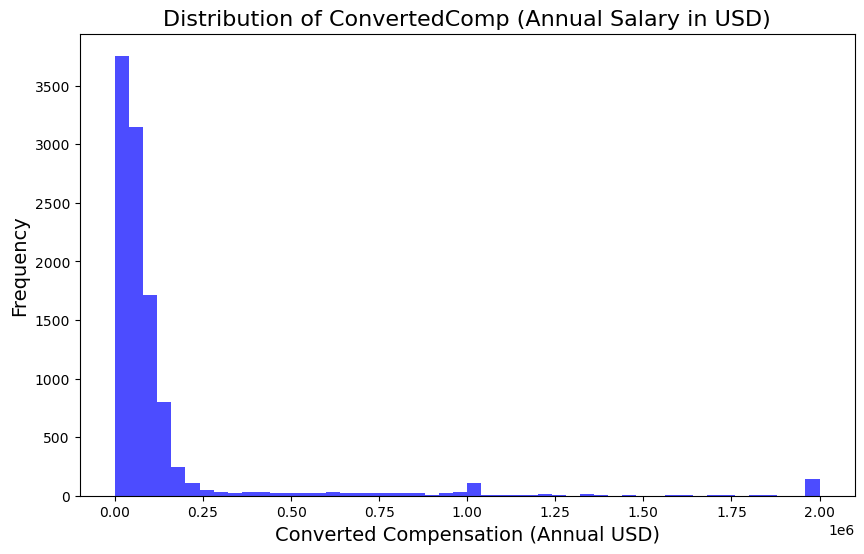

In [9]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['ConvertedComp'].dropna(), bins=50, color='blue', alpha=0.7)  # Drop NaN values and plot histogram

# Add labels and title
plt.title("Distribution of ConvertedComp (Annual Salary in USD)", fontsize=16)
plt.xlabel("Converted Compensation (Annual USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


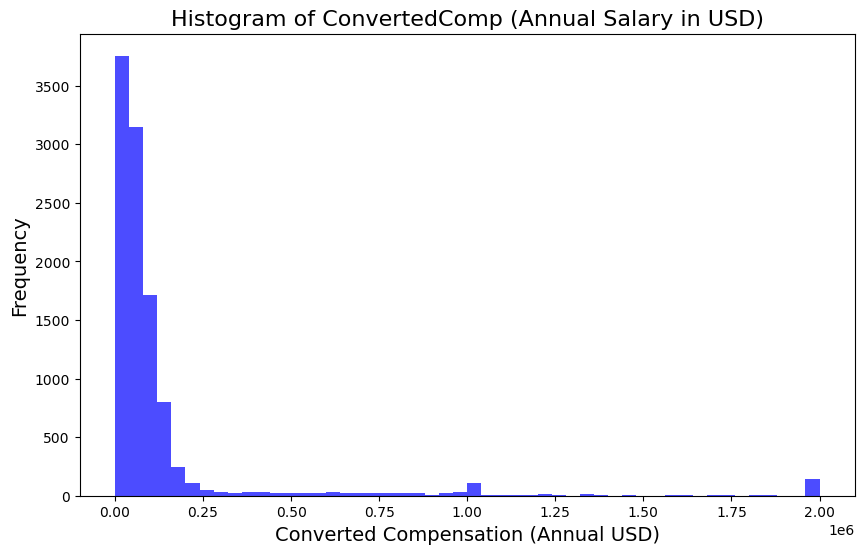

In [10]:
# your code goes here
# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['ConvertedComp'].dropna(), bins=50, color='blue', alpha=0.7)  # Drop NaN values and plot histogram

# Add labels and title
plt.title("Histogram of ConvertedComp (Annual Salary in USD)", fontsize=16)
plt.xlabel("Converted Compensation (Annual USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_convertedcomp = df['ConvertedComp'].median()

# Print the result
print(f"The median of ConvertedComp is: {median_convertedcomp}")

The median of ConvertedComp is: 57745.0


In [24]:
# Calculate the median of the 'Age' column
median_age = df['Age'].median()

# Print the result
print(f"The median of Age is: {median_age}")

The median of Age is: 29.0


How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
# Count the number of respondents who identified themselves as 'Man' in the 'Gender' column
num_men = df[df['Gender'] == 'Man'].shape[0]

# Print the result
print(f"Number of respondents who identified themselves as 'Man': {num_men}")

Number of respondents who identified themselves as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
# your code goes here
# Filter the DataFrame for responders who identified themselves as a Woman
df_women = df[df['Gender'] == 'Woman']  # Replace 'Gender' with the actual column name for gender if different

# Calculate the median for the 'ConvertedComp' column
median_comp_women = df_women['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp for responders identified as a Woman is: {median_comp_women}")

The median ConvertedComp for responders identified as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Print the result
print(five_number_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


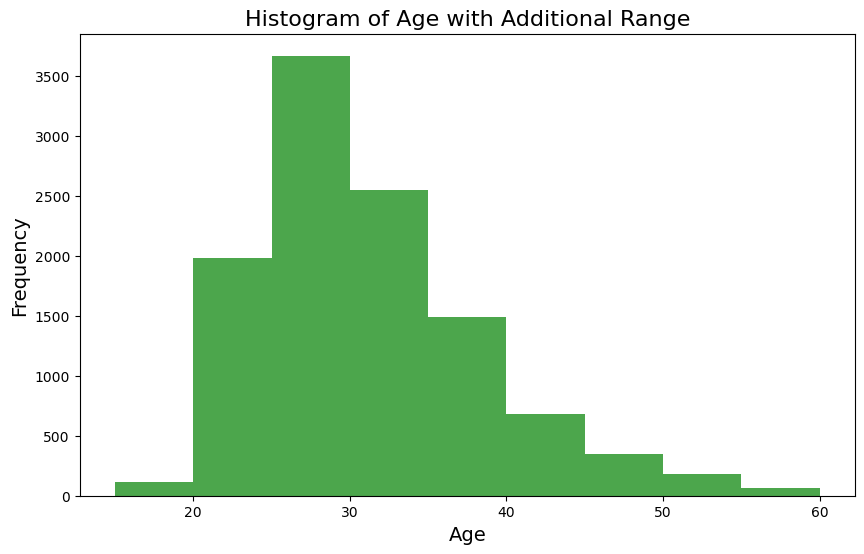

In [27]:
# your code goes here
# Define the bins and range for the 'Age' column
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]  # Adjust these bins to your desired ranges
age_range = (df['Age'].min(), df['Age'].max())  # Get the min and max age from the data

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=bins, color='green', alpha=0.7, range=age_range)

# Add labels and title
plt.title("Histogram of Age with Additional Range", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


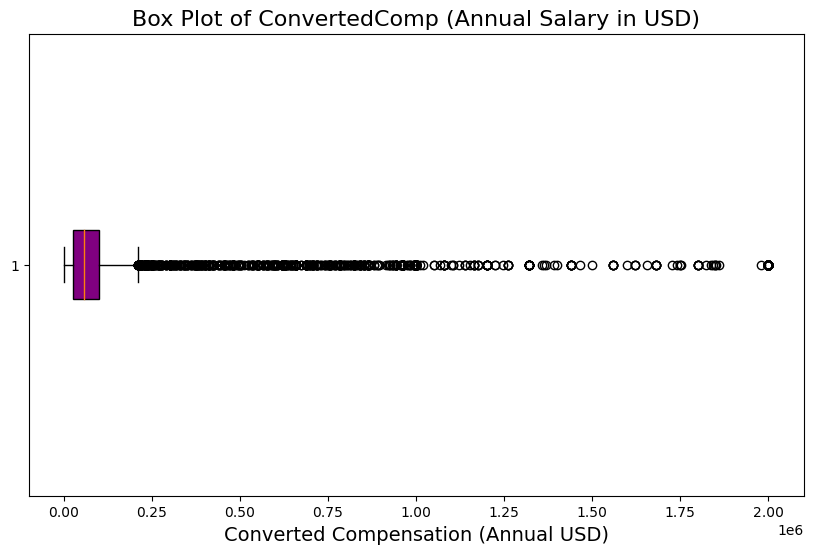

In [18]:
# your code goes here
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['ConvertedComp'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))

# Add title and labels
plt.title("Box Plot of ConvertedComp (Annual Salary in USD)", fontsize=16)
plt.xlabel("Converted Compensation (Annual USD)", fontsize=14)

# Show the plot
plt.show()

In [29]:
# Calculate Q1 (first quartile) and Q3 (third quartile) for the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound for outliers (values below Q1 - 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR

# Identify outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Count the number of outliers
num_outliers_below_Q1 = outliers_below_Q1.shape[0]

# Print the result
print(f"Number of outliers below Q1 in the 'Age' column: {num_outliers_below_Q1}")

Number of outliers below Q1 in the 'Age' column: 0


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the result
print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")

The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'ConvertedComp' column
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Get the number of outliers
num_outliers = outliers.shape[0]

# Print the result
print(f"Number of outliers in the 'ConvertedComp' column: {num_outliers}")

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
# your code goes here

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by filtering out the outliers in the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to verify the removal of outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape (without outliers): {df_no_outliers.shape}")


Original DataFrame shape: (11398, 85)
New DataFrame shape (without outliers): (9703, 85)


In [28]:
# Calculate the median of the 'ConvertedComp' column after removing outliers
median_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp after removing outliers is: {median_comp_no_outliers}")

The median ConvertedComp after removing outliers is: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# your code goes here
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation between 'Age' and all other numerical columns
correlation_with_age = df[numerical_columns].corr()['Age']

# Print the result
print(correlation_with_age)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
